## FHNW Machine Learning - FS2024

In [1]:
# DO NOT EDIT

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Bewertete Übung 03

**Ausgabe:** Montag 20.05.2024

**Abgabe:**  Montag 10.06.2024, 23:59 Uhr


## Vorgaben zu Umsetzung und Abgabe

- Die Algorithmen müssen auf der Basis von Array Operationen selber implementiert werden.
- Der Code muss lauffähig sein bei Ausführung im Docker-Container zum Repo oder auf JHub. 
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Zu jedem Plot gehört eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten, die damit sichtbar werden, festhält.  
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in in Ihrem Fork des Repos.  

- **Bitte löschen, duplizieren (splitten!) und verschieben Sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen.
- Laufzeit vom Notebook: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**


### Module

Neben den Python-Basismodulen dürfen Sie die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn`,  `tqdm`.

Sie dürfen auch generell [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [`sklearn.model_selection`](https://scikit-learn.org/stable/model_selection.html) und [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) benutzen.

Zusätzliche Module dürfen Sie nur verwenden wenn ausdrücklich erwähnt oder bereits vorgegeben in der Code-Cell.

## Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Daniele arbeitet bei einem grossen Schweizer TV-Anbieter und hat von Mika erfahren, dass Sie mit Machine-Learning echten Mehrwert liefern können. Daniele hat den Auftrag bekommen Film-Empfehlungen für Kunden zu erstellen, damit die Kunden bessere Vorschläge bekommen und das neue Streaming-Angebot nutzen. Das Management möchte, dass Daniele mit modernen Machine-Learning Ansätzen arbeitet und diese evaluiert. Insbesondere soll [_collaborative filtering_](https://en.wikipedia.org/wiki/Collaborative_filtering) ausprobiert werden, wobei Kunden mit ähnlichen Präferenzen gefunden werden um dann gemeinsam (_collaborative_) Empfehlungen generieren zu können. 

Das Modell soll in Echtzeit, also sobald neue _Ratings_ verfügbar sind, aktualisiert werden können. Deshalb hat man entschieden einen Ansatz zu wählen mit dem man mit _Stochastic Gradient Descent (SGD)_ das Modell mit einzelnen Beobachtungen anpassen (trainieren) kann. Das wäre auch in Echtzeit aktualisierbar.

In einem ersten Schritt soll mit öffentlich verfügbaren Daten ein Modell erstellt und getestet werden um zu beurteilen, ob sich weitere Investments in Empfehlungssysteme lohnen. Sie sollen Daniele dabei unterstützen und auf dem bekannten [_MovieLens_](https://movielens.org/) Datensatz einen Prototyp erstellen.



## Ziel

Unser Ziel ist es zu beantworten ob es möglich ist sinnvolle Empfehlungen zu generieren.

## Aufgabe 1 (8 Punkte)

In dieser Aufgabe geht es darum die Daten einzulesen, kennenzulernen und für die Modellierung vorzubereiten.



### Aufgabe 1a

Lesen Sie die Datensätze `movies.csv` und `ratings.csv` ein.

Charakterisieren Sie die Datensätze indem Sie folgende Aufgaben erledigten, bzw. Fragen beantworten. Nur die Beantwortung der folgenden Fragen wird bewertet:

1. Beschreiben Sie die Datensätze kurz in Worten: Was ist jeweils der Inhalt und wie hängen die beiden Datensätze zusammen?
2. Erstellen Sie die Rating-Matrix $R$ mit dem bereitgestellten Code `create_rating_matrix`. $R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u  x N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Filme (Items). Der Eintrag $r_{u,i}$ indexiert das Rating von User $u$ für den Film $i$ in $R$. Verifizieren Sie, dass die Anzahl Zeilen und die Anzahl Spalten stimmen.
3. Was ist die _Sparsity_ von $R$?
4. Zeigen Sie anhand von $R$ die Verteilung über die Ratings und beschreiben Sie diese mit Worten.
5. Zeigen Sie anhand von $R$ die Verteilung über jeweils die mittleren User- und die mittleren Movie Ratings.
6. Welcher Film wurde am besten, welcher am schlechtesten bewertet?
7. Untersuchen Sie den Zusammenhang von "imdbRating" / "imdbVotes" und den bereitgestellten Ratings in `ratings.csv`.
8. Finden Sie je einen Film und einen User welche "extrem" sind (bzw. mögliche Anomalien sind). Sie können das selber, sinnvoll, definieren.


Sie können die Fragen mit Code beantworten (mit Grafiken und/oder Print-Statements). Referenzieren Sie klar auf die Fragennummer. Beispiel:

```
print("1) Die Datensätze...")
print(f"3) Die Sparsity beträgt: {sparsity:.3f}")
```

Sie können auch eine zusätzliche Text-Zelle einfügen und Fragen so beantworten.

1. **Beschreiben Sie die Datensätze kurz in Worten: Was ist jeweils der Inhalt und wie hängen die beiden Datensätze zusammen?**\
   Die movies.csv Datei enthält Informationen zu Filmen. Die wesentlichen Spalten sind:
   - `movieId`: Eine eindeutige ID für jeden Film.
   - `title`: Der Titel des Films.
   - `isAdult`: Ein Indikator, ob der Film als Erwachsenenfilm (18+) klassifiziert ist (0 oder 1).
   - `year`: Das Jahr, in dem der Film veröffentlicht wurde.
   - `runtime`: Die Laufzeit des Films in Minuten.
   - `genres`: Die Genres, zu denen der Film gehört als Array (`['genre1', 'genre2']`). 
   - `imdbRating`: Die Bewertung des Films auf IMDb.
   - `imdbVotes`: Die Anzahl der Bewertungen, die der Film auf IMDb erhalten hat.
   
   Die ratings.csv Datei enthält Informationen zu den Bewertungen der Filme durch die Benutzer. Die wesentlichen Spalten sind:

   - `userId`: Eine eindeutige ID für jeden Benutzer.
   - `movieId`: Eine eindeutige ID für jeden Film.
   - `rating`: Die Bewertung, die ein Benutzer einem Film gegeben hat.
   - `timestamp`: Der Zeitstempel, wann die Bewertung abgegeben wurde.
  
   Die beiden Datensätze sind durch die `movieId` Spalte verbunden.

2) Die Rating-Matrix hat die Dimensionen: (610, 3647).
3) Die Sparsity beträgt: 0.959


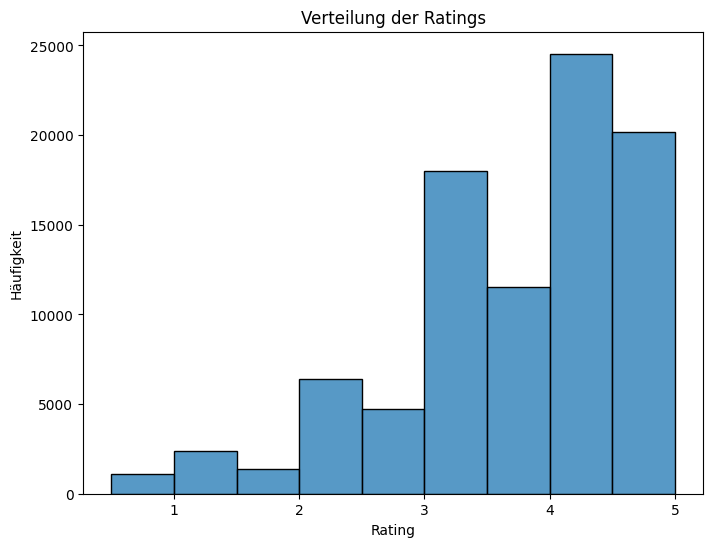

4) Die Verteilung der Ratings zeigt, dass die meisten Bewertungen im Bereich von 4 bis 5 liegen.


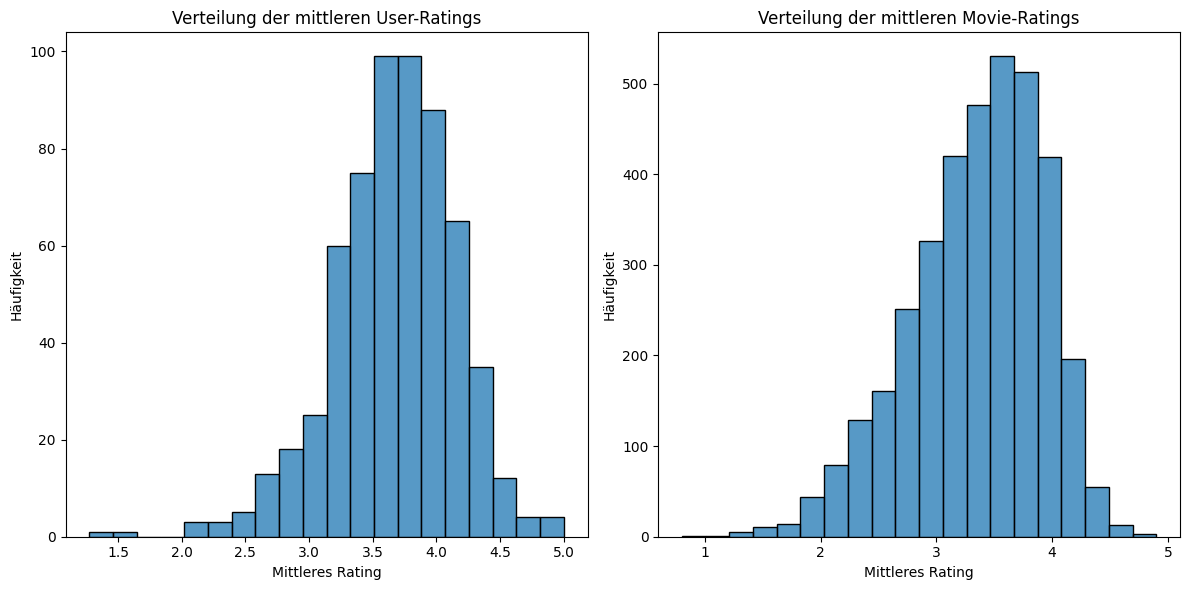

5) Die Verteilung der mittleren Ratings zeigt, dass die meisten Benutzer und Filme durchschnittliche Bewertungen im Bereich von 3 bis 4 haben.
6) Der beste bewertete Film ist 'The Trial' mit einer durchschnittlichen Bewertung von 4.90.
Der schlechteste bewertete Film ist 'Police Academy: Mission to Moscow' mit einer durchschnittlichen Bewertung von 0.80.


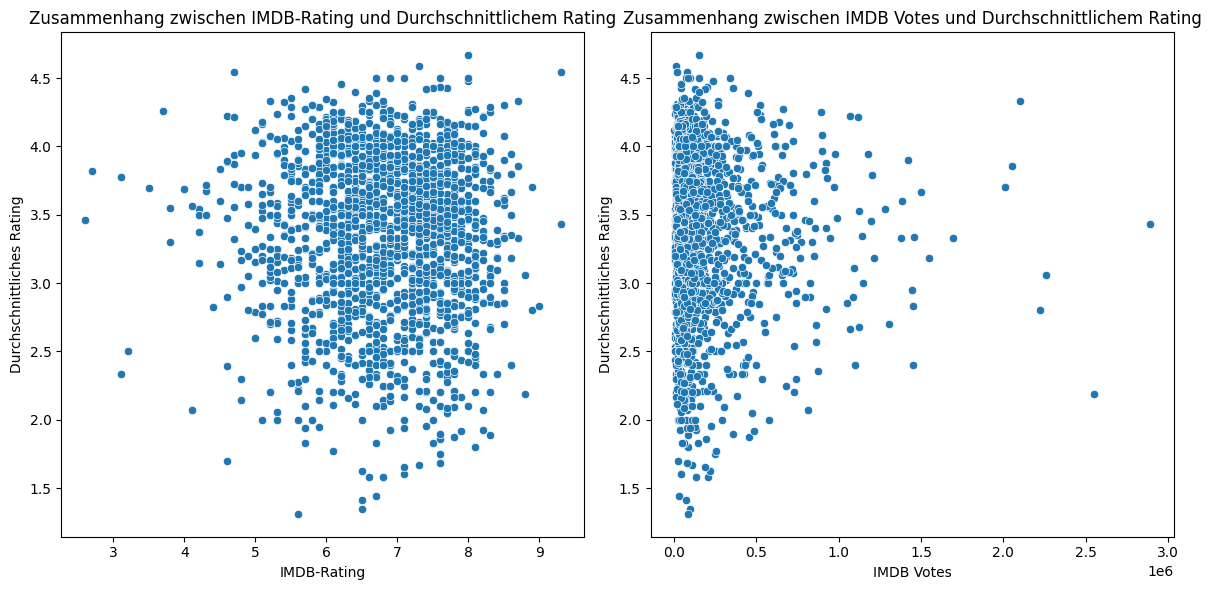

7) Der Zusammenhang zeigt, dass Filme mit höherem IMDB-Rating und mehr IMDB Votes tendenziell auch höhere Durchschnitts-Ratings in den bereitgestellten Daten haben.
8) Extreme Filme und Benutzer wurden identifiziert:
   Film - highest mean rating: The Trial
   Film - lowest mean rating: Police Academy: Mission to Moscow
   Film - most rated: Forrest Gump
   Film - least rated: The Wolf Man
   Benutzer - highest mean rating: 53
   Benutzer - lowest mean rating: 442
   Benutzer - most ratings: 414
   Benutzer - least ratings: 175


In [2]:
from typing import Dict, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


def create_rating_matrix(df: pd.DataFrame) -> (np.ndarray, Dict[int, int], Dict[int, int]):
    """Create Ratings Matrix and Mapping Tables. 
        
        Args:
            df: pd.DataFrame with columns [movieId, userId, rating]
    
        Returns:
                Ratings-Matrix (np.ndarray),
                Column-No to Movie-ID Mapper (Dict[column_number, movieId]),
                Row-No to User-ID Mapper (Dict[row_number, userId])

        Remark:
            Zero-Entries in Ratings-Matrix are missing / non-existing ratings
    """
    # Mapping Tables
    map_movie_to_id = {k:i for i, k in enumerate(df['movieId'].unique())}
    map_user_to_id = {k:i for i, k in enumerate(df['userId'].unique())}
    
    map_col_id_to_movie = {v: k for k, v in map_movie_to_id.items()}
    map_row_id_to_user_id = {v: k for k, v in map_user_to_id.items()}

    mapped_user_id = df['userId'].map(map_user_to_id)
    mapped_movie_id = df['movieId'].map(map_movie_to_id)
    
    # Create Ratings Matrix
    from scipy.sparse import csc_matrix
    ratings = csc_matrix(
        (df['rating'], (mapped_user_id, mapped_movie_id)),
        shape=(len(map_user_to_id.keys()), 
               len(map_movie_to_id.keys()))).toarray()

    return ratings, map_col_id_to_movie, map_row_id_to_user_id


R, map_col_id_to_movie, map_row_id_to_user = create_rating_matrix(ratings)


num_users = len(ratings['userId'].unique())
num_movies = len(ratings['movieId'].unique())

assert R.shape == (num_users, num_movies), "Die Dimensionen der Rating-Matrix stimmen nicht überein."

print(f"2) Die Rating-Matrix hat die Dimensionen: {R.shape}.")



total_elements = R.shape[0] * R.shape[1]
non_zero_elements = np.count_nonzero(R)
sparsity = 1 - (non_zero_elements / total_elements)

print(f"3) Die Sparsity beträgt: {sparsity:.3f}")



ratings_values = R[R != 0].flatten()

_ = plt.figure(figsize=(8, 6))
_ = sns.histplot(ratings_values, bins=9, kde=False)
_ = plt.title('Verteilung der Ratings')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Häufigkeit')
plt.show()

print("4) Die Verteilung der Ratings zeigt, dass die meisten Bewertungen im Bereich von 4 bis 5 liegen.")

_ = plt.figure(figsize=(12, 6))

mean_user_ratings = np.mean(R, axis=1, where=(R != 0))

_ = plt.subplot(1, 2, 1)
_ = sns.histplot(mean_user_ratings[~np.isnan(mean_user_ratings)], bins=20, kde=False)
_ = plt.title('Verteilung der mittleren User-Ratings')
_ = plt.xlabel('Mittleres Rating')
_ = plt.ylabel('Häufigkeit')

mean_movie_ratings = np.mean(R, axis=0, where=(R != 0))

_ = plt.subplot(1, 2, 2)
_ = sns.histplot(mean_movie_ratings[~np.isnan(mean_movie_ratings)], bins=20, kde=False)
_ = plt.title('Verteilung der mittleren Movie-Ratings')
_ = plt.xlabel('Mittleres Rating')
_ = plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

print("5) Die Verteilung der mittleren Ratings zeigt, dass die meisten Benutzer und Filme durchschnittliche Bewertungen im Bereich von 3 bis 4 haben.")


# Berechnung der mittleren Bewertungen pro Film
mean_ratings_per_movie = np.nanmean(np.where(R != 0, R, np.nan), axis=0)

# Bester und schlechtester bewerteter Film
best_movie_idx = np.nanargmax(mean_ratings_per_movie)
worst_movie_idx = np.nanargmin(mean_ratings_per_movie)

best_movie_id = map_col_id_to_movie[best_movie_idx]
worst_movie_id = map_col_id_to_movie[worst_movie_idx]

best_movie_title = movies[movies['movieId'] == best_movie_id]['title'].values[0]
worst_movie_title = movies[movies['movieId'] == worst_movie_id]['title'].values[0]

print(f"6) Der beste bewertete Film ist '{best_movie_title}' mit einer durchschnittlichen Bewertung von {mean_ratings_per_movie[best_movie_idx]:.2f}.")
print(f"Der schlechteste bewertete Film ist '{worst_movie_title}' mit einer durchschnittlichen Bewertung von {mean_ratings_per_movie[worst_movie_idx]:.2f}.")

# Merging der Ratings mit den Movie-Informationen
merged_df = ratings.merge(movies, on='movieId')

# Durchschnittliches Rating pro Film
avg_ratings_per_movie = merged_df.groupby('movieId')['rating'].mean()

# Plotten der Korrelationen
_ = plt.figure(figsize=(12, 6))

_ = plt.subplot(1, 2, 1)
_ = sns.scatterplot(x=movies['imdbRating'], y=avg_ratings_per_movie)
_ = plt.title('Zusammenhang zwischen IMDB-Rating und Durchschnittlichem Rating')
_ = plt.xlabel('IMDB-Rating')
_ = plt.ylabel('Durchschnittliches Rating')

_ = plt.subplot(1, 2, 2)
_ = sns.scatterplot(x=movies['imdbVotes'], y=avg_ratings_per_movie)
_ = plt.title('Zusammenhang zwischen IMDB Votes und Durchschnittlichem Rating')
_ = plt.xlabel('IMDB Votes')
_ = plt.ylabel('Durchschnittliches Rating')

plt.tight_layout()
plt.show()

print("7) Der Zusammenhang zeigt, dass Filme mit höherem IMDB-Rating und mehr IMDB Votes tendenziell auch höhere Durchschnitts-Ratings in den bereitgestellten Daten haben.")



# Extreme Filme (mittlere Bewertungen)
extreme_movies = {
    'highest_mean_rating': np.nanargmax(mean_ratings_per_movie),
    'lowest_mean_rating': np.nanargmin(mean_ratings_per_movie),
    'most_rated': np.nanargmax(np.count_nonzero(R, axis=0)),
    'least_rated': np.nanargmin(np.count_nonzero(R, axis=0))
}

# Extreme Benutzer (mittlere Bewertungen)
extreme_users = {
    'highest_mean_rating': np.nanargmax(mean_user_ratings),
    'lowest_mean_rating': np.nanargmin(mean_user_ratings),
    'most_ratings': np.nanargmax(np.count_nonzero(R, axis=1)),
    'least_ratings': np.nanargmin(np.count_nonzero(R, axis=1))
}

print("8) Extreme Filme und Benutzer wurden identifiziert:")
for key, idx in extreme_movies.items():
    movie_id = map_col_id_to_movie[idx]
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"   Film - {key.replace('_', ' ')}: {movie_title}")

for key, idx in extreme_users.items():
    user_id = map_row_id_to_user[idx]
    print(f"   Benutzer - {key.replace('_', ' ')}: {user_id}")


## Aufgabe 2 (21 Punkte)

In dieser Aufgabe implementieren Sie einen Sklearn-Estimator um ein Modell der Daten zu fitten mit dem Empfehlungen generiert werden können.


### Aufgabe 2a

Sie möchten eine Rating Matrix $R$ in zwei Matrizen $U \in \mathbb{R}^{N_u \times K}$ (User-Faktoren) und $M \in \mathbb{R}^{N_i \times K}$ (Movie-Faktoren) faktorisieren. Die Faktorisierung $\hat{R}$ soll $R$ möglichst gut approximieren im Sinne des quadrierten Fehlers. $K$ sind die Anzahl Faktoren.

Die Gleichung sieht folgendermassen aus und enthält zusätzlich noch Bias-Vektoren.

\begin{align}
R \approx \hat{R} = UM^T + \mathbf{b_u} + \mathbf{b_m}^T + \overline{r}
\end{align}

$R$ hat die Dimensionalität $R \in \mathbb{R}^{N_u \times N_i}$, wobei $N_u$ die Anzahl Users sind und $N_i$ die Anzahl Items. $\mathbf{b}_u \in \mathbb{R}^{N_u}$ ist ein User-Bias Vektor, $\mathbf{b}_m \in \mathbb{R}^{N_i}$ ein Item-Bias Vektor, und $\overline{r}$ das globale Durchschnittsrating (die Bias-Vektoren müssen mit _broadcasting_ addiert werden). 

Die Hoffnung ist, dass $\hat{R}$ dort wo $R$ keine Einträge hat (da die Matrix $R$ relativ sparse ist), realistische Einträge erzeugt, die für Empfehlungen genutzt werden können.

Wir möchten den quadrierten Fehler zwischen $\hat{R}$ und $R$ minimieren. Zusätzlich möchten wir mit einer Regularisierung ($\Omega$) Overfitting verhindern. Dazu definieren wir folgende Kostenfunktion:

\begin{align}
J(U, M, \mathbf{b_u},\mathbf{b_m}) &= \frac{1}{| \mathbb{Z} |} \Big(\sum_{u, i \in \mathbb{Z}} \frac{1}{2}(r^{(u,i)} - \hat{r}^{(u,i)})^2 + \sum_{u, i \in \mathbb{Z}} \Omega^{(u, i)} \Big)
\end{align}

Wobei:

\begin{align}
\hat{r}^{(u,i)} &= \mathbf{u}^{(u)T} \mathbf{m}^{(i)} + b_u^{(u)} + b_m^{(i)} \\
\Omega^{(u, i)} &= \frac{\lambda}{2} \Big( \lVert \mathbf{u}^{(u)} \rVert^2_2 +  \lVert \mathbf{m}^{(i)} \rVert^2_2 + b_u^{(u)2} + b_m^{(i)2} \Big)
\end{align}

$\mathbb{Z}$ ist das Set der bekannten/nicht-null Einträge der Rating-Matrix $R$ (alle Kombinationen von $(u,r)$ die vorkommen). $\mathbf{u}^{(u)T}$ ist der $u$-te Zeilenvektor von $U$ und $\mathbf{m}^{(i)}$ der $i$-te Spaltenvektor von $M^T$. $\lambda$ ist der Regularisierungsfaktor. Das globale Durchschnittsrating $\overline{r}$ berechnen wir auf $R$ und ziehen das von allen Ratings ab. Wir führen die Optimisierung als auf $R_{\text{center}} = R - \overline{r}$ durch. Die quadrierte L-2 Norm ist folgendermassen definiert: $\lVert \mathbf{z} \rVert^2_2 = \sum_i (z^{(i)})^2$.

### Optimisierung mit Stochastic Gradient Descent (SGD)

Man optimiert die Kostenfunktion abwechselnd, mal für $\mathbf{u}^{(u)T}$ und dann für $\mathbf{m}^{(i)}$ (und die Biases), wobei man die andere Variable jeweils konstant hält. Das führt zu einem _least squares_ Optimisierungs-Problem. Mit _SGD_ approximiert man die Kostenfunktion (und deren Gradienten) mit einem per Sample-Loss $L$:

Mit $M$ fix:
\begin{align}
L(U, r^{(u,i)}) &= \frac{1}{2} (r^{(u,i)} - \hat{r}^{(u,i)})^2 + \Omega^{(u, i)} \\
J(U) &= \mathbb{E}_{u,i \sim \mathbb{Z}} L(U, r^{(u,i)}) = \frac{1}{| \mathbb{Z} |} \sum_{u, i \in \mathbb{Z}}  L(U, r^{(u,i)})
\end{align}

Mit $U$ fix:
\begin{align}
L(M, r^{(u,i)}) &= \frac{1}{2} (r^{(u,i)} - \hat{r}^{(u,i)})^2 + \Omega^{(u, i)} \\
J(M) &= \mathbb{E}_{u,i \sim \mathbb{Z}} L(M, r^{(u,i)}) = \frac{1}{| \mathbb{Z} |} \sum_{u, i \in \mathbb{Z}}  L(M, r^{(u,i)})
\end{align}

### Algorithmus

Wir optimieren die Kostenfunktion für jeden Eintrag in der Rating-Matrix $R$ mit folgendem Algorithmus. Wobei $\eta$ die _learning rate_ ist und $t$ den Iterationschritt indexiert.

For all $u, i \in \mathbb{Z}$ do:

\begin{align}
\mathbf{u}^{(u)}_{t+1} &= \mathbf{u}^{(u)}_{t} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial \mathbf{u}^{(u)}_{t}} \\
\mathbf{m}^{(i)}_{t+1} &= \mathbf{m}^{(i)}_{t} - \eta \frac{\partial L(M, r^{(u,i)})}{\partial \mathbf{m}^{(i)}_{t}} \\
b_{m, t+1}^{(i)} &= b_{m, t}^{(i)} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial b_{m, t}^{(i)}} \\
b_{u, t+1}^{(u)} &= b_{u, t}^{(u)} - \eta \frac{\partial L(U, r^{(u,i)})}{\partial b_{u, t}^{(u)}} \\
\end{align}

Repeat until _max epochs_ is reached.

### Implementation

Ergänzen Sie die Klasse `SparseMatrixFactorization`.


**Beachten Sie:**

- In sklearn wird statt $\lambda$ jeweils $\alpha$ `alpha` als Bezeichnung für die Regularisierungsstärke verwendet (wohl weil `lambda` ein reserviertes Wort ist in Python).

- Coursera verwendet für die Bezeichung der Anzahl Datenpunkte $m$. Hier verwenden wir $n$, was gebräuchlicher ist. Ausserdem: $w$ ist ein Skalar, $\mathbf{w}$ ein Vektor und $\mathbf{W}$ eine Matrix.

- Implementieren Sie alles vektorisiert.



In [3]:
from typing import Self

from sklearn.base import BaseEstimator
import numpy as np
from numpy.random import default_rng
from tqdm.notebook import tqdm


class SparseMatrixFactorization(BaseEstimator):

    """ Sparse Matrix Factorization with Stochastic Gradient Descent """
    def __init__(self, alpha: float, lr: float, num_components: int, num_epochs: int, random_seed: int=123):
        """
            Args:
                alpha: regularization constant
                lr: learning rate constant
                num_components: dimensionaliy of each user / item vector
                num_epochs: number of passes over each entry in the Rating matrix
                random_seed: random seed for reproducibility
        """
        self.alpha = alpha
        self.lr = lr
        self.num_components = num_components
        self.num_epochs = num_epochs
        self.random_seed = random_seed


    def _initialize(self, X: np.ndarray) -> None:
        """Initiaizes user and item weights and biases.

            Args:
                X (num_users, num_items) - The Rating Matrix

            Returns:
                None
        """
        rng = default_rng(self.random_seed)
        
        num_users, num_items = X.shape
        self.U = rng.normal(0, 0.1, (num_users, self.num_components))
        self.M = rng.normal(0, 0.1, (num_items, self.num_components))
        
        self.b_u = np.zeros(num_users)
        self.b_m = np.zeros(num_items)
        
        self.global_mean = np.mean(X[np.nonzero(X)])


    def fit(self, X: np.ndarray) -> Self:
        """Fit the model.
        
            Args:
                X (num_users, num_items) - The Rating Matrix
    
            Returns:
                Self
        """
        self._initialize(X)
        self.epoch_end_cost_ = list()
        
        nz = np.array(np.nonzero(X)).T
        
        for epoch in range(self.num_epochs):
            np.random.shuffle(nz) # TODO?
            for u, i in nz:
                self.take_one_step(X, (u, i))
            pred = self.predict()
            cost = self.calc_cost(X, pred)
            self.epoch_end_cost_.append(cost)
        
        return self


    def take_one_step(self, X: np.ndarray, rating: (int, int)) -> None:
        """Take one gradient descent step for a specific item/user weight.
    
            Args:
                X (num_users, num_items) - The Rating Matrix
                rating (row_idx, column_idx) - Rating coordinates specified via
                    User (row-index) and Item (column-index) for which to 
                    calculate the gradient for

            Returns:
                None
        """
        u, i = rating
        
        pred = self.global_mean + self.b_u[u] + self.b_m[i] + np.dot(self.U[u], self.M[i])
        error = X[u, i] - pred
        
        dJ_dU, dJ_dM, dJ_dB_u, dJ_dB_m = self.calc_gradients(error, self.M[i], self.U[u], self.b_u[u], self.b_m[i])
        
        self.U[u] += self.lr * dJ_dU
        self.M[i] += self.lr * dJ_dM
        self.b_u[u] += self.lr * dJ_dB_u
        self.b_m[i] += self.lr * dJ_dB_m


    def calc_gradients(
            self,
            error: float,
            m_item: np.ndarray,
            u_user: np.ndarray,
            bias_user: float,
            bias_item: float) -> (float, float, float, float):
        """ Calculate Gradients
            Args:
                error: for a single rating entry
                m_item: weights of a single item [num_components]
                u_user: weights of a single user [num_components]
                bias_user: bias of a single user (scalar)
                bias_item: bias of a single item (scalar)
            Returns:
                Tuple (dJ_dUser, dJ_dItem, dJ_dUserBias, dJ_dItemBias)
                
                with shapes:
                
                ([num_components], [num_components], float, float)
        """
        dJ_dU = error * m_item - self.alpha * u_user
        dJ_dM = error * u_user - self.alpha * m_item
        dJ_dB_u = error - self.alpha * bias_user
        dJ_dB_m = error - self.alpha * bias_item
        
        return dJ_dU, dJ_dM, dJ_dB_u, dJ_dB_m


    def predict(self) -> np.ndarray:
        """ Calculate Approximation of Rating Matrix
            Returns:
                Approximation of Rating Matrix [num_users, num_items]
        """
        return self.global_mean + self.b_u[:, np.newaxis] + self.b_m[np.newaxis, :] + self.U @ self.M.T

    
    def score(self, X: np.ndarray) -> float:
        """ Mean Squared Error between X and Approximation
            Args:
                X: Ratings Matrix [num_users, num_items]
            Returns:
                MSE (float)
        """
        pred = self.predict()
        mse = np.mean((X[np.where(X != 0)] - pred[np.where(X != 0)])**2)
        return mse


    def score_mae(self, X: np.ndarray) -> float:
        """ Mean Absolute Error between X and Approximation
            Args:
                X: Ratings Matrix [num_users, num_items]
            Returns:
                MAE (float)
        """
        pred = self.predict()
        mae = np.mean(np.abs(X[np.where(X != 0)] - pred[np.where(X != 0)]))
        return mae
    
    def calc_cost(self, y_true: np.ndarray, y_pred: np.ndarray) -> (float, float, float):
        """ Cost function
            Args:
                y_true: Ratings Matrix [num_users, num_items]
                y_pred: Predicted Ratings Matrix [num_users, num_items]
            Returns:
                Tuple with (total cost, squared_error_cost, regularization_cost)
        """
        nz = np.array(np.nonzero(y_true)).T
        
        squared_error_cost = np.sum((y_true[nz[:,0], nz[:,1]] - y_pred[nz[:,0], nz[:,1]])**2) / 2
        regularization_cost = self.alpha / 2 * (np.sum(self.U**2) + np.sum(self.M**2) + np.sum(self.b_u**2) + np.sum(self.b_m**2))
        
        total_cost = squared_error_cost + regularization_cost
        
        return total_cost, squared_error_cost, regularization_cost
    

### Aufgabe 2b
Die folgende Zelle enthält verschiedene Tests die Ihre Implementation prüfen. Sorgen Sie dafür, dass die folgenden Tests erfolgreich sind. Stellen Sie sicher, dass die Input-Shapes der Methoden die Sie implementieren den Doc-Strings entsprechen.

**Achtung: Die Tests sind sehr simpel. Sie können also nicht davon ausgehen, dass Ihre Implementation korrekt ist sobald die Tests erfolgreich sind.**

Ihre Abgabe wird noch mit weiteren, für Sie nicht sichtbare Tests, geprüft. Es ist grundsätzlich ihre Aufgabe, die Implementation genau zu prüfen. Sie können dazu weitere Zellen mit eigenen Tests einfügen. Sie können jedoch die folgende Zelle nicht ändern. Diese wird nach Abgabe wieder überschrieben, sodass die von mir definierten Tests ausgeführt werden.

In [4]:
import numpy as np

def print_result(test_name, passed, expected, actual):
    status = "Passed" if passed else "Failed"
    print(f"{status} test: {test_name}")
    print(f"----> Expected: {expected}")
    print(f"----> Actual: {actual}")

def test_ones_matrix():
    # Create a ones matrix
    X = np.ones((5, 5))
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.01, num_components=2, num_epochs=50, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        np.testing.assert_allclose(predictions, 1, atol=0.1)
        print_result("test_ones_matrix", True, np.ones((5, 5)), predictions)
    except AssertionError as e:
        print_result("test_ones_matrix", False, np.ones((5, 5)), predictions)


def test_twos_matrix():
    X = np.ones((5, 5)) + 1
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.01, num_components=2, num_epochs=50, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        np.testing.assert_allclose(predictions, 2, atol=0.1)
        print_result("test_twos_matrix", True, np.ones((5, 5)) + 1, predictions)
    except AssertionError as e:
        print_result("test_twos_matrix", False, np.ones((5, 5)) + 1, predictions)


def test_random_matrix():
    X = np.array([
        [4, 1, 4, 2],
        [3, 5, 2, 2],
        [2, 3, 1, 4],
        [2, 3, 2, 2]
    ])
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.1, num_components=4, num_epochs=100, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    # The predictions should be close to the input, since there are no missing (zero) entries
    try:
        np.testing.assert_allclose(predictions, X, atol=0.1)
        print_result("test_random_matrix", True, X, predictions)
    except AssertionError as e:
        print_result("test_random_matrix", False, X, predictions)

        
def test_sparse_matrix():
    # Create a 5x6 matrix with random values and some zeros
    X = np.array([
        [5, 3, 0, 1, 2, 0],
        [4, 0, 3, 0, 0, 2],
        [0, 1, 5, 0, 3, 4],
        [2, 0, 0, 4, 1, 0],
        [0, 4, 2, 0, 0, 5]
    ])
    
    # Initialize the model
    model = SparseMatrixFactorization(alpha=0, lr=0.1, num_components=4, num_epochs=100, random_seed=123)
    
    # Fit the model
    model.fit(X)
    
    # Make predictions
    predictions = model.predict()
    
    try:
        # Check that non-zero entries are close to the input values
        non_zero_indices = np.nonzero(X)
        np.testing.assert_allclose(predictions[non_zero_indices], X[non_zero_indices], atol=1.0)
        print_result("test_sparse_matrix", True, X[non_zero_indices], predictions[non_zero_indices])
    except:
        print_result("test_sparse_matrix", False, X[non_zero_indices], predictions[non_zero_indices])
    
    try:
        # Check that zero entries in the original matrix are now non-zero in the predictions
        zero_indices = np.where(X == 0)
        assert np.all(predictions[zero_indices] >= 0.0)
        print_result("test_sparse_matrix", True, "all larger than 0.0" , predictions[zero_indices])
    except AssertionError as e:
        print_result("test_sparse_matrix", False, "all larger than 0.0", predictions[zero_indices])


for test in [test_ones_matrix, test_twos_matrix, test_random_matrix, test_sparse_matrix]:
    try:
        test()
    except Exception as e:
        print(f"Error during testing - test: {test} error: {e}")
        

Passed test: test_ones_matrix
----> Expected: [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
----> Actual: [[1.0106595  0.99564321 0.99373076 0.99217282 1.0059265 ]
 [0.9925639  1.006313   1.00464246 1.0103681  0.98913656]
 [0.99042847 1.00351261 1.00556254 1.00640419 0.99546828]
 [0.99909746 0.99544642 1.00009915 0.99323119 1.00963433]
 [1.00660592 0.99907339 0.99627611 0.99781257 1.00005123]]
Passed test: test_twos_matrix
----> Expected: [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
----> Actual: [[2.01067161 1.99565105 1.99374857 1.99219034 2.00591842]
 [1.99256509 2.00631006 2.00464967 2.01037407 1.98911705]
 [1.99042809 2.00350779 2.00556802 2.00640822 1.99544767]
 [1.99909431 1.9954391  2.00010203 1.99323329 2.00961135]
 [2.00661314 1.99907623 1.99628904 1.99782483 2.00003826]]
Passed test: test_random_matrix
----> Expected: [[4 1 4 2]
 [3 5 2 2]
 [2 3 1 4]
 [2 3 2 2]]
----> Actual: [[3.99986

### Aufgabe 2c

Trainieren Sie nun drei Modelle auf dem ganzen Datenset, berechnen und geben Sie jeweils `mean squared error` und `mean absolute error` aus. Plotten Sie Total-Loss, Squared-Error-Loss und Regularisierungs-Loss pro Epoche in eine Grafik für jedes Modell. 


Verwenden Sie folgende Hyper-Parameter für Modell 1:

- $\lambda$: 1e-4
- $\eta$: 0.01
- $K$: 5
- `num_epochs`: 40


Verwenden Sie folgende Hyper-Parameter für Modell 2:

- $\lambda$: 1e-4
- $\eta$: 0.01
- $K$: 10
- `num_epochs`: 40

Verwenden Sie folgende Hyper-Parameter für Modell 3:

- $\lambda$: 1e-3
- $\eta$: 0.01
- $K$: 5
- `num_epochs`: 40



Model 1 - MSE: 0.43878158302361825, MAE: 0.5074653243968674
Model 2 - MSE: 0.32991976681944435, MAE: 0.437171783303842
Model 3 - MSE: 0.43911605501858025, MAE: 0.5082174721511143


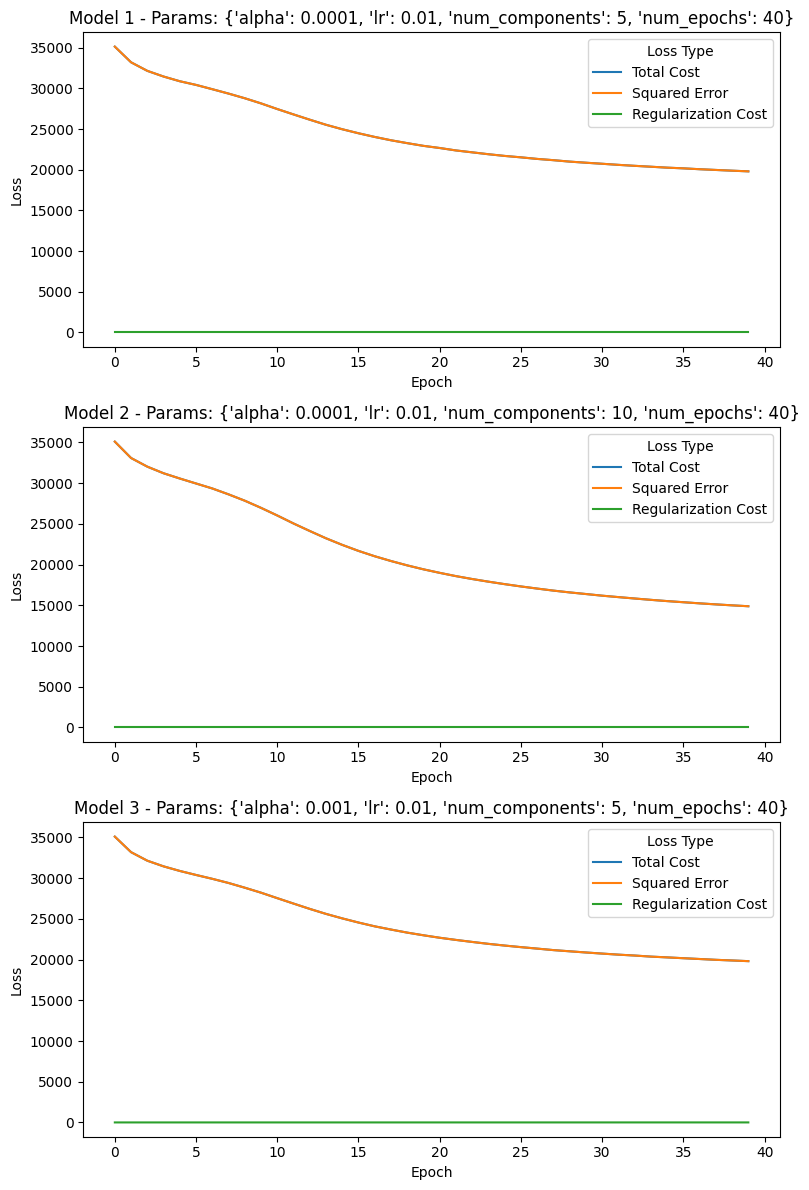

In [5]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Erstellen der Rating-Matrix
R, map_col_id_to_movie, map_row_id_to_user_id = create_rating_matrix(ratings)

params = [
    {"alpha": 1e-4, "lr": 0.01, "num_components": 5, "num_epochs": 40},
    {"alpha": 1e-4, "lr": 0.01, "num_components": 10, "num_epochs": 40},
    {"alpha": 1e-3, "lr": 0.01, "num_components": 5, "num_epochs": 40},
]

fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

for i, param in enumerate(params):
    model = SparseMatrixFactorization(**param)
    _ = model.fit(R)
    
    mse = model.score(R)
    mae = model.score_mae(R)
    
    print(f"Model {i+1} - MSE: {mse}, MAE: {mae}")
    
    costs = np.array(model.epoch_end_cost_)
    total_costs = costs[:, 0]
    squared_errors = costs[:, 1]
    regularization_costs = costs[:, 2]
    
    epochs = np.arange(1, param['num_epochs'] + 1)

    epochs = range(param["num_epochs"])
    df = pd.DataFrame({
        'Epoch': epochs,
        'Total Cost': total_costs,
        'Squared Error': squared_errors,
        'Regularization Cost': regularization_costs
    }).melt(id_vars=['Epoch'], var_name='Loss Type', value_name='Loss')
    
    _ = sns.lineplot(data=df, x='Epoch', y='Loss', hue='Loss Type', ax=axes[i])
    _ = axes[i].set_title(f'Model {i+1} - Params: {param}')

plt.tight_layout()
plt.show()

### Aufgabe 2d

Diskutieren Sie die Grafiken. Interpretieren Sie die Unterschiede bezüglich der unterschiedlichen Hyper-Parameter.

YOUR ANSWER HERE

## Aufgabe 3 (6 Punkte)

In dieser Aufgabe versuchen wir ein möglichst gutes Modell zu finden.


Sie werden dazu einen zufällig generierten Train-Test Split erstellen. Dabei soll immer genau ein zufällig ausgewähltes Rating pro User dem Test-Split zugeordnet werden, wobei die anderen Ratings dieses Users im Train-Split bleiben. Verwenden Sie dazu die Funktion `leave_one_out_split`.

In [6]:
def leave_one_out_split(X: np.ndarray, random_seed=123) -> Tuple[np.ndarray, np.ndarray]:
    """Split dataset by randomly assigning one element of each row to test, the others to train.
    
        Args:
            X: Ratings-Matrix [num_users, num_items]
            random_seed: for reproducibility

        Returns:
            Tuple(Xtrain [num_users, num_items], Xtest[num_users, num_items])
    """
    X_test = np.zeros_like(X)
    X_train = X.copy()
    
    random_state = np.random.RandomState(random_seed)

    for user_row in range(X.shape[0]):
        non_zero = X[user_row, :].nonzero()[0]
        item_col = random_state.choice(non_zero)
        X_test[user_row, item_col] = X[user_row, item_col]
        X_train[user_row, item_col] = 0

    return X_train, X_test

# X_train, X_test = leave_one_out_split(ratings)

# assert np.bincount(X_test.nonzero()[0]).max() == 1, \
#     "Each row (user) must have exactly 1 non-zero rating"

# assert all((ratings > 0).sum(axis=1) - (X_train > 0).sum(axis=1)) == 1, \
#     "Each user has exactly one rating less in the training set as compared to the full set"
        

### Aufgabe 3a

Vergleichen Sie mehrere Hyper-Parameter miteinander. Selektieren Sie das beste Modell gemäss _Mean Absolute Error_ (MAE) mit einem geeigneten Verfahren. Verwenden Sie dazu die Funktion `leave_one_out_split`.

In [7]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Aufgabe 4 (5 Punkte)

In dieser Aufgabe versuchen wir die Qualität der Recommendations qualitativ zu beurteilen.

### Aufgabe 4a

Erstellen Sie Empfehlungen (z.B. Top-5 predicted Ratings) für die ersten 3 User in der Ratings-Matrix mit ihrem besten Modell und versuchen Sie die Empfehlungen ganz grob qualitativ zu beurteilen.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Aufgabe 4b

Was halten Sie von den Empfehlungen? Was ist ihr Gesamteindruck vom Projekt? Geben Sie Daniele Feedback zu ihren Erkenntnissen.

YOUR ANSWER HERE